In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


REBUILD_DATA = False # set to true to one once, then back to false unless you want to change something in your training data.

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "/home/trojan/Downloads/kagglecatsanddogs_3367a/PetImages/Cat"
    DOGS = "/home/trojan/Downloads/kagglecatsanddogs_3367a/PetImages/Dog"
    #TESTING = "PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []

    catcount = 0
    dogcount = 0

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                if "jpg" in f:
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])  # do something like print(np.eye(2)[1]), just makes one_hot 
                        #print(np.eye(2)[self.LABELS[label]])

                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1

                    except Exception as e:
                        pass
                        #print(label, f, str(e))

        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print('Cats:',dogsvcats.catcount)
        print('Dogs:',dogsvcats.dogcount)


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 5)
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.conv3 = nn.Conv2d(64, 128, 5)

        x = torch.randn(50,50).view(-1,1,50,50)
        self._to_linear = None
        self.convs(x)

        self.fc1 = nn.Linear(self._to_linear, 512)
        self.fc2 = nn.Linear(512, 2)

    def convs(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv3(x)), (2,2))

        if self._to_linear is None:
            self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
        return x

    def forward(self, x):
        x = self.convs(x)
        x = x.view(-1, self._to_linear)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.softmax(x, dim=1)



if torch.cuda.is_available():
    device = torch.device("cuda:0")  # you can continue going on here, like cuda:1 cuda:2....etc. 
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")




net = Net().to(device)

if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

training_data = np.load("training_data.npy", allow_pickle=True)
print(len(training_data))

optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.MSELoss()

X = torch.Tensor([i[0] for i in training_data]).view(-1, 50, 50)
X = X/255.0
y = torch.Tensor([i[1] for i in training_data])

VAL_PCT = 0.1
val_size = int(len(X)*VAL_PCT)
print(val_size)

train_X = X[:-val_size]
train_y = y[:-val_size]

test_X = X[-val_size:]
test_y = y[-val_size:]

print(len(train_X))
print(len(test_X))


def train(net):
    BATCH_SIZE = 100
    EPOCHS = 3
    for epoch in range(EPOCHS):
        for i in tqdm(range(0, len(train_X), BATCH_SIZE)):
            batch_X = train_X[i:i+BATCH_SIZE].view(-1,1,50,50)
            batch_y = train_y[i:i+BATCH_SIZE]

            batch_X, batch_y = batch_X.to(device), batch_y.to(device)

            net.zero_grad()
            outputs = net(batch_X)
            loss = loss_function(outputs, batch_y)
            loss.backward()
            optimizer.step()
        print(loss)

def test(net):
    correct = 0
    total = 0
    with torch.no_grad():
        for i in tqdm(range(len(test_X))):
            real_class = torch.argmax(test_y[i]).to(device)
            net_out = net(test_X[i].view(-1, 1, 50, 50).to(device))[0]

            predicted_class = torch.argmax(net_out)
            if predicted_class == real_class:
                correct += 1
            total += 1
    print("Accuracy:", round(correct/total,3))

In [5]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


REBUILD_DATA = False # set to true to one once, then back to false unless you want to change something in your training data.

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "/home/trojan/Downloads/kagglecatsanddogs_3367a/PetImages/Cat"
    DOGS = "/home/trojan/Downloads/kagglecatsanddogs_3367a/PetImages/Dog"
    #TESTING = "PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []

    catcount = 0
    dogcount = 0

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                if "jpg" in f:
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])  # do something like print(np.eye(2)[1]), just makes one_hot 
                        #print(np.eye(2)[self.LABELS[label]])

                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1

                    except Exception as e:
                        pass
                        #print(label, f, str(e))

        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print('Cats:',dogsvcats.catcount)
        print('Dogs:',dogsvcats.dogcount)


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 5)
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.conv3 = nn.Conv2d(64, 128, 5)

        x = torch.randn(50,50).view(-1,1,50,50)
        self._to_linear = None
        self.convs(x)

        self.fc1 = nn.Linear(self._to_linear, 512)
        self.fc2 = nn.Linear(512, 2)

    def convs(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv3(x)), (2,2))

        if self._to_linear is None:
            self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
        return x

    def forward(self, x):
        x = self.convs(x)
        x = x.view(-1, self._to_linear)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.softmax(x, dim=1)



if torch.cuda.is_available():
    device = torch.device("cuda:0")  # you can continue going on here, like cuda:1 cuda:2....etc. 
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")




net = Net().to(device)

if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

training_data = np.load("training_data.npy", allow_pickle=True)
print(len(training_data))

optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.MSELoss()

X = torch.Tensor([i[0] for i in training_data]).view(-1, 50, 50)
X = X/255.0
y = torch.Tensor([i[1] for i in training_data])

VAL_PCT = 0.1
val_size = int(len(X)*VAL_PCT)
print(val_size)

train_X = X[:-val_size]
train_y = y[:-val_size]

test_X = X[-val_size:]
test_y = y[-val_size:]

print(len(train_X))
print(len(test_X))

Running on the GPU
24946
2494
22452
2494


In [14]:
def fwd_pass(X, y, train=False):
    if train:
        net.zero_grad()
    outputs = net(X)
    matches = [torch.argmax(i) == torch.argmax(j) for i, j in zip(outputs, y)]
    acc = matches.count(True)/len(matches)
    loss = loss_function(outputs, y)
    
    if train:
        loss.backward()
        optimizer.step()
    return acc, loss

In [16]:
#random slice
def test(size = 32):
    random_start = np.random.randint(len(test_X)-size)
    X, y = test_X[random_start:random_start+size], test_y[random_start:random_start+size]
    with torch.no_grad():
        val_acc, val_loss = fwd_pass(X.view(-1,1,50,50).to(device), y.to(device))
    return val_acc, val_loss

val_acc, val_loss = test(size=32)
print(val_acc, val_loss)

0.625 tensor(0.2475, device='cuda:0')


In [32]:
import time

MODEL_NAME = f"model-{int(time.time())}"

net = Net().to(device)

optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.MSELoss()

print(MODEL_NAME)

def train():
    BATCH_SIZE = 100
    EPOCHS = 5
    with open("model.log", "a") as f:
        for epoch in range(EPOCHS):
            for i in tqdm(range(0, len(train_X), BATCH_SIZE)):
                batch_X = train_X[i:i+BATCH_SIZE].view(-1,1,50,50).to(device)
                batch_y = train_y[i:i+BATCH_SIZE].to(device)
                
                acc, loss = fwd_pass(batch_X, batch_y, train=True)
                
                #every 50 steps, validate, if we do it every step, we increase training time
                if i % 50 == 0: 
                    val_acc, val_loss = test(size=100)
                    f.write(f"{MODEL_NAME},{round(time.time(),3)},{round(float(acc),2)},{round(float(loss), 4)},{round(float(val_acc),2)},{round(float(val_loss),4)}\n")
                    
                    
train()
                    

  1%|▏         | 3/225 [00:00<00:08, 26.37it/s]

model-1585468409


100%|██████████| 225/225 [00:05<00:00, 42.11it/s]


<Figure size 432x288 with 0 Axes>

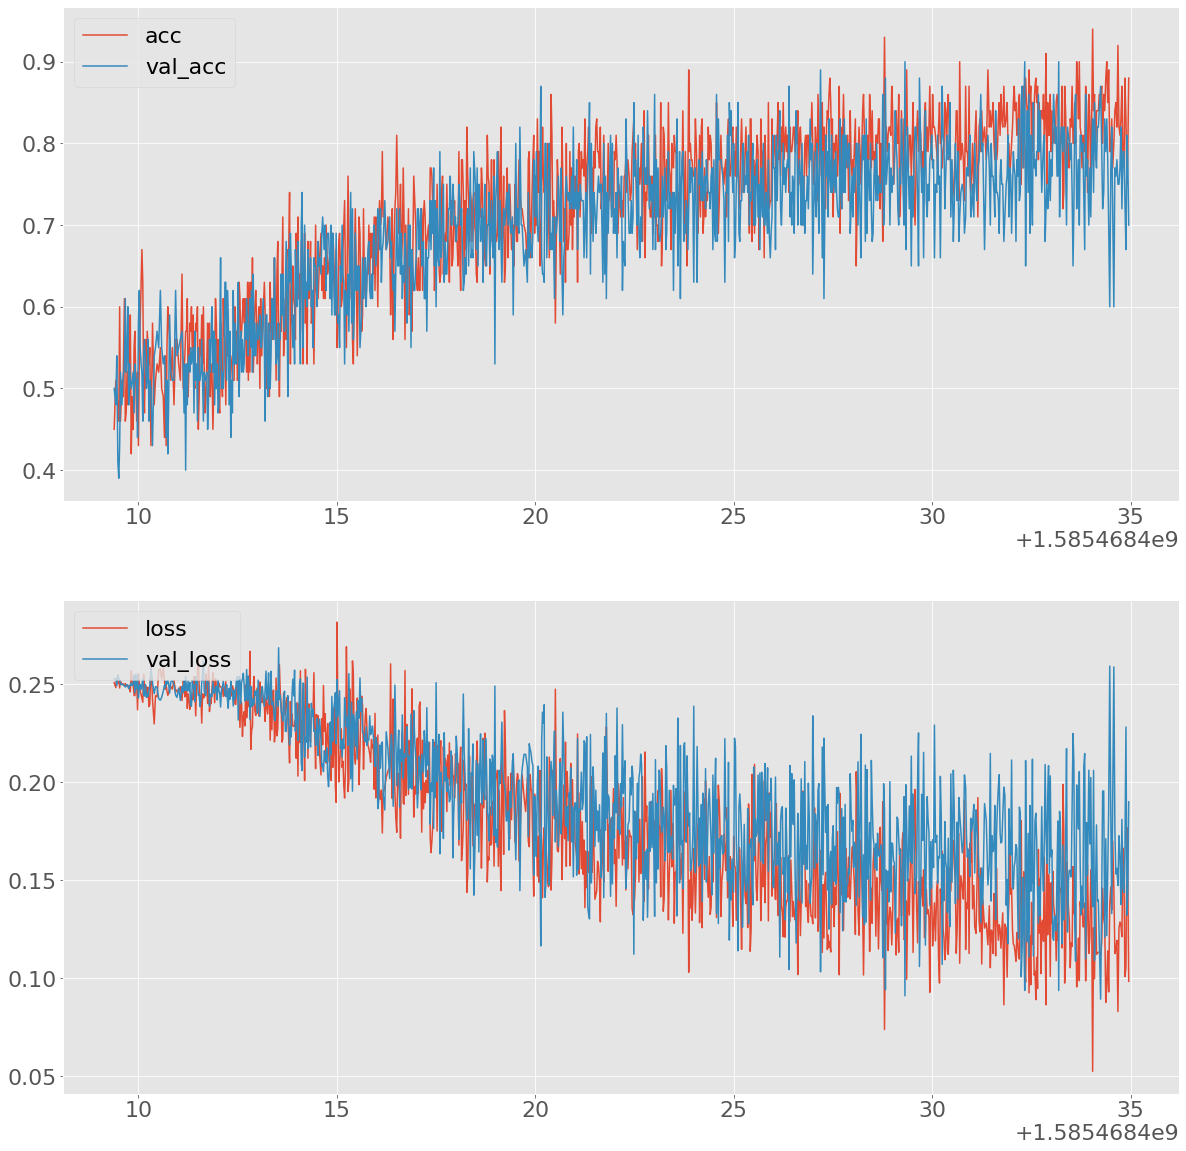

In [50]:
#we can use pandas too for graph from model.log
%matplotlib notebook
%matplotlib inline


import matplotlib.pyplot as plt
from matplotlib import style

style.use("ggplot")
model_name = "model-1585468409" #or MODEL_NAME

def create_acc_loss_graph(model_name):
    contents = open("model.log", "r").read().split('\n')
    
    times = []
    accuracies = []
    losses = []
    
    val_accs = []
    val_losses = []
    
    for c in contents:
        if model_name in c:
            name, timestamp, acc, loss, val_acc, val_loss = c.split(",")
            
            times.append(float(timestamp))
            accuracies.append(float(acc))
            losses.append(float(loss))
            
            val_accs.append(float(val_acc))
            val_losses.append(float(val_loss))
            
    fig = plt.figure() #for multiple figurs, for one thing just use plt.plot(times, accuracies) and plt.show()
    plt.figure(figsize=(20,20))
    plt.rcParams.update({'font.size': 22})

    #define axis, each axis is a graph
    ax1 = plt.subplot2grid((2,1), (0,0))
    ax2 = plt.subplot2grid((2,1), (1,0), sharex=ax1)


    ax1.plot(times, accuracies, label="acc")
    ax1.plot(times, val_accs, label="val_acc")
    ax1.legend(loc=2)
    ax2.plot(times,losses, label="loss")
    ax2.plot(times,val_losses, label="val_loss")
    ax2.legend(loc=2)
    
    plt.show()   
    
    
    
create_acc_loss_graph(model_name)

In [65]:
import time

MODEL_NAME = f"model-{int(time.time())}"

net = Net().to(device)

optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.MSELoss()

print(MODEL_NAME)

def train():
    BATCH_SIZE = 100
    EPOCHS = 30
    with open("model2.log", "a") as f:
        for epoch in range(EPOCHS):
            for i in tqdm(range(0, len(train_X), BATCH_SIZE)):
                batch_X = train_X[i:i+BATCH_SIZE].view(-1,1,50,50).to(device)
                batch_y = train_y[i:i+BATCH_SIZE].to(device)
                
                acc, loss = fwd_pass(batch_X, batch_y, train=True)
                
                #every 50 steps, validate, if we do it every step, we increase training time
                if i % 50 == 0: 
                    val_acc, val_loss = test(size=100)
                    f.write(f"{MODEL_NAME}, {epoch}, {round(time.time(),3)},{round(float(acc),2)},{round(float(loss), 4)},{round(float(val_acc),2)},{round(float(val_loss),4)}\n")
                    
                    
train()

  1%|▏         | 3/225 [00:00<00:08, 25.44it/s]

model-1585470368


100%|██████████| 225/225 [00:04<00:00, 46.23it/s]


<Figure size 432x288 with 0 Axes>

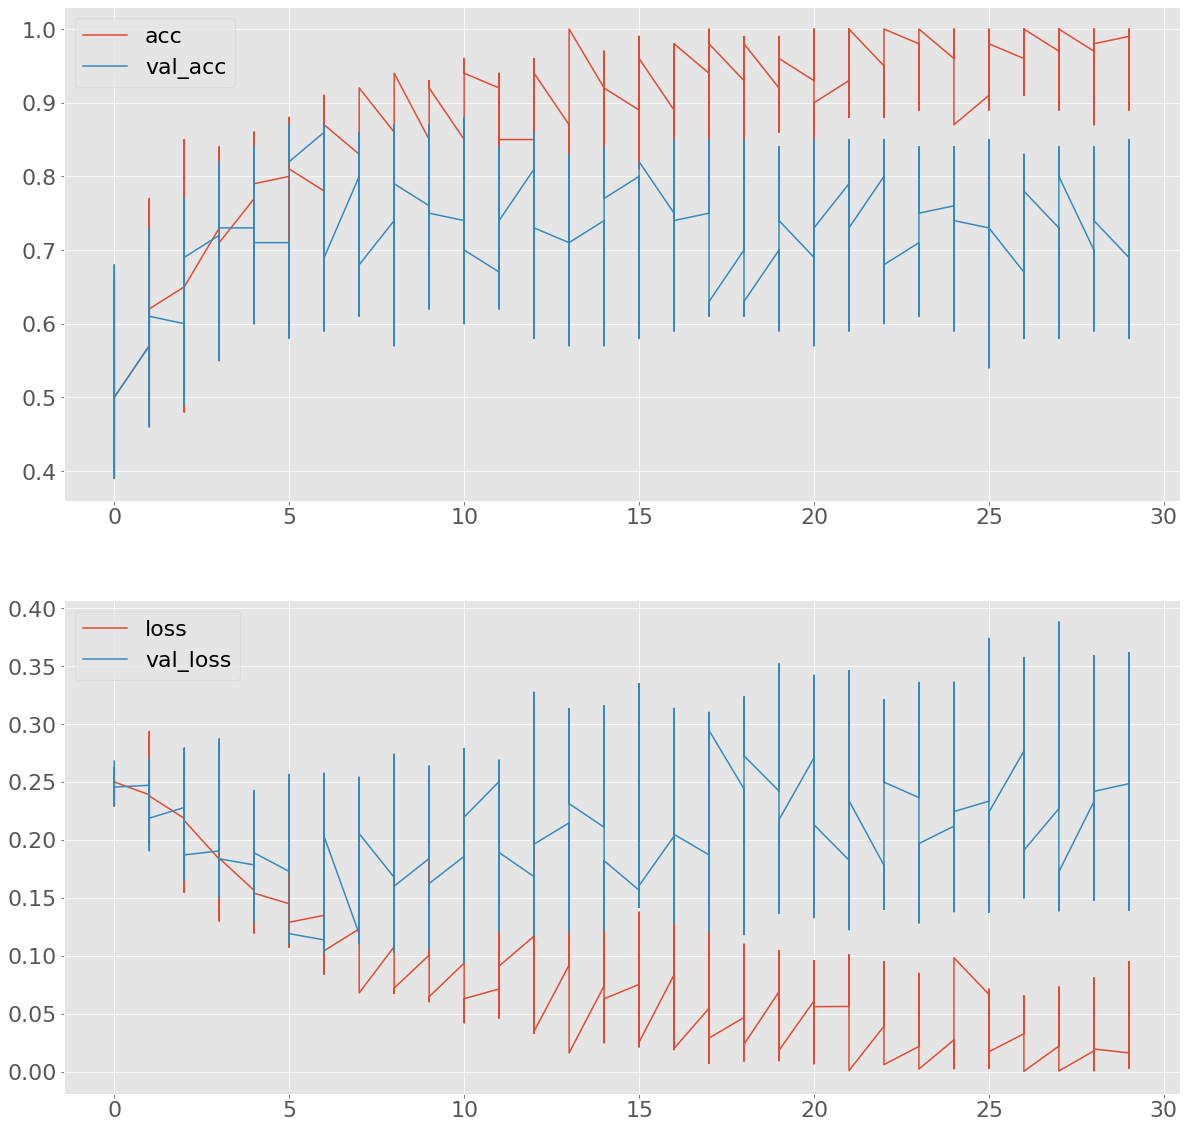

In [66]:
#In EPOCH Form

%matplotlib notebook
%matplotlib inline


import matplotlib.pyplot as plt
from matplotlib import style
from scipy.interpolate import interp1d
style.use("ggplot")
model_name = "model-1585470368" #or MODEL_NAME

def create_acc_loss_graph(model_name):
    contents = open("model2.log", "r").read().split('\n')
    
    epochs = []
    times = []
    accuracies = []
    losses = []
    
    val_accs = []
    val_losses = []
    
    for c in contents:
        if model_name in c:
            name, epoch, timestamp, acc, loss, val_acc, val_loss = c.split(",")
            
            epochs.append(float(epoch))
            times.append(float(timestamp))
            accuracies.append(float(acc))
            losses.append(float(loss))
            
            val_accs.append(float(val_acc))
            val_losses.append(float(val_loss))
            
    fig = plt.figure() #for multiple figurs, for one thing just use plt.plot(times, accuracies) and plt.show()
    plt.figure(figsize=(20,20))
    plt.rcParams.update({'font.size': 22})

    #define axis, each axis is a graph
    ax1 = plt.subplot2grid((2,1), (0,0))
    ax2 = plt.subplot2grid((2,1), (1,0), sharex=ax1)

    ax1.plot(epochs, accuracies, label="acc")
    ax1.plot(epochs, val_accs, label="val_acc")
    ax1.legend(loc=2)
    ax2.plot(epochs,losses, label="loss")
    ax2.plot(epochs,val_losses, label="val_loss")
    ax2.legend(loc=2)
    
    plt.show()   
    
    
    
create_acc_loss_graph(model_name)

<Figure size 432x288 with 0 Axes>

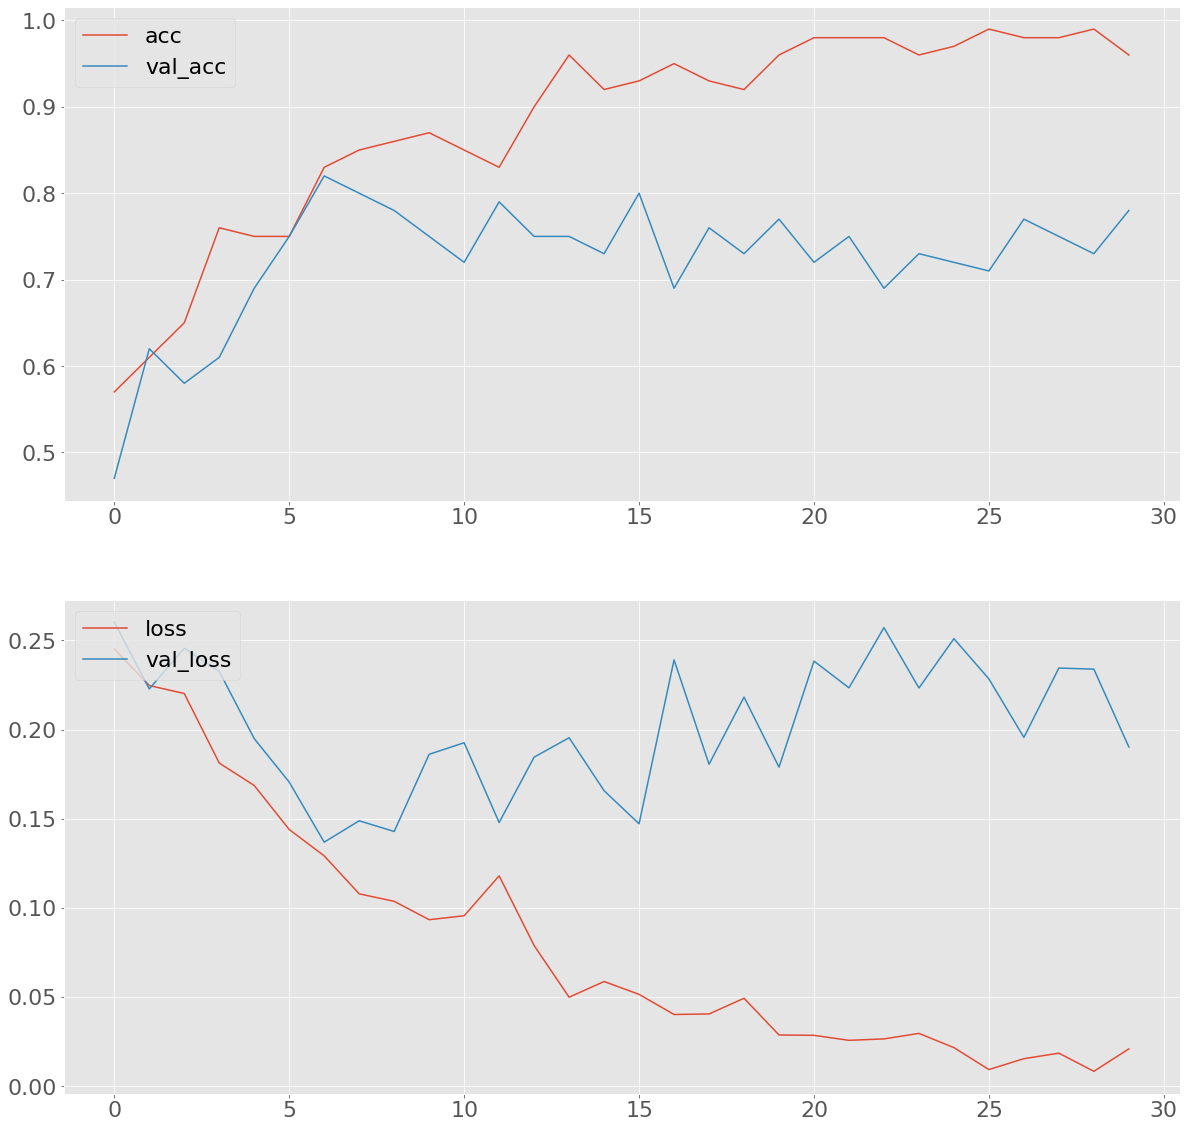

In [100]:
#SMOOTH plots

%matplotlib notebook
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from scipy.interpolate import interp1d

style.use("ggplot")
model_name = "model-1585470368" #or MODEL_NAME

def create_acc_loss_graph(model_name):
    contents = open("model2.log", "r").read().split('\n')
    
    epochs = []
    times = []
    accuracies = []
    losses = []
    
    val_accs = []
    val_losses = []
    
    for c in contents:
        if model_name in c:
            name, epoch, timestamp, acc, loss, val_acc, val_loss = c.split(",")
            
            epochs.append(float(epoch))
            times.append(float(timestamp))
            accuracies.append(float(acc))
            losses.append(float(loss))
            
            val_accs.append(float(val_acc))
            val_losses.append(float(val_loss))
            
    fig = plt.figure() #for multiple figurs, for one thing just use plt.plot(times, accuracies) and plt.show()
    plt.figure(figsize=(20,20))
    plt.rcParams.update({'font.size': 22})

    #define axis, each axis is a graph
    ax1 = plt.subplot2grid((2,1), (0,0))
    ax2 = plt.subplot2grid((2,1), (1,0), sharex=ax1)

    epochs = np.asarray(epochs)
    
    f1 = interp1d(epochs, accuracies)
    f2 = interp1d(epochs, val_accs)
    f3 = interp1d(epochs, losses)
    f4 = interp1d(epochs, val_losses)
    
    ax1.plot(epochs, f1(epochs), label="acc")
    #ax1.plot(epochs, accuracies, label="acc")
    ax1.plot(epochs, f2(epochs), label="val_acc")
    #ax1.plot(epochs, val_accs, label="val_acc"))
    ax1.legend(loc=2)
    #ax2.plot(epochs,losses, label="loss")
    ax2.plot(epochs, f3(epochs), label="loss")
    #ax2.plot(epochs,val_losses, label="val_loss")
    ax2.plot(epochs, f4(epochs), label="val_loss")
    ax2.legend(loc=2)
    
    plt.show()   
    
    
    
create_acc_loss_graph(model_name)